<a href="https://colab.research.google.com/github/Luisrocha1905/SSN./blob/main/homework_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using 301 grid points.
n= 0 , E(numeric)=-6.6428
n= 1 , E(numeric)=-6.6407
n= 2 , E(numeric)=-2.4509
n= 3 , E(numeric)=-2.3152
n= 4 , E(numeric)=0.4168
Plotting


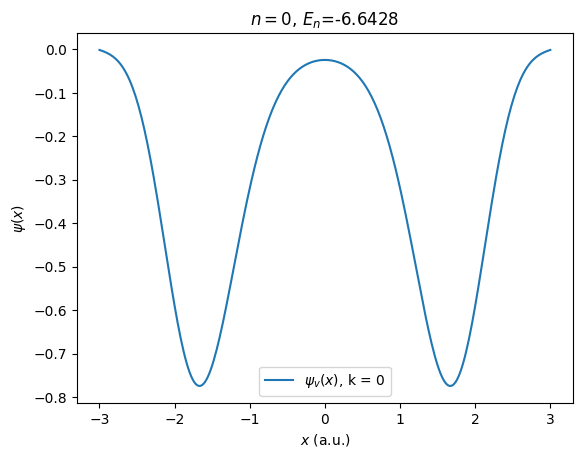

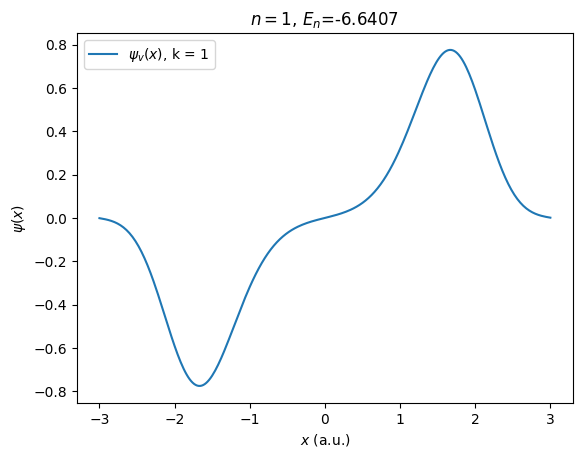

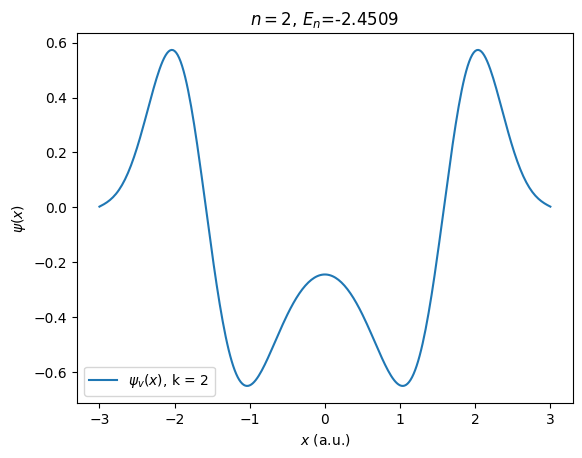

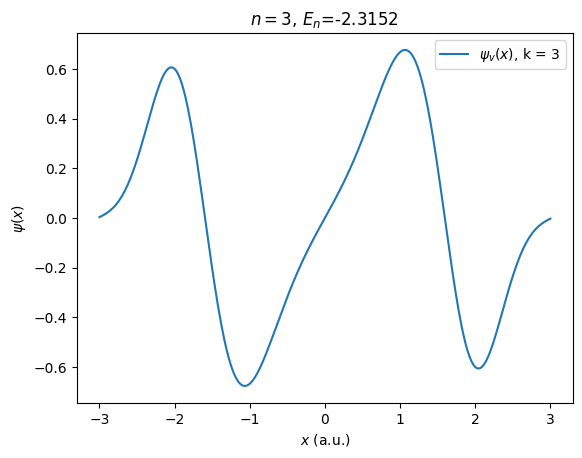

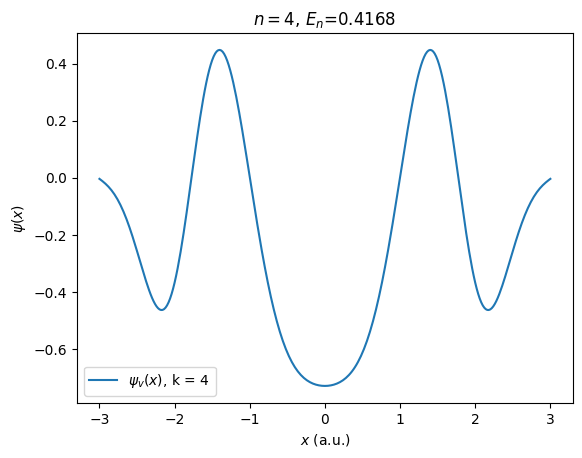

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Potential as a function of position
def getV(x, b=1, c=6):
    return b * x**4 - c * x**2
# Discretized Schrödinger equation matrix
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F
# Interval for calculating the wave function [-L/2,L/2]
L = 6
xlower = -L/2.0
xupper = L/2.0

#Discretization options
h = 0.02  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

# Compute Hamiltonian matrix and solve eigenvalue problem
F = Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eigh(F)

# Order results by eigenvalue
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:, idx]

# Convert eigenvalues to energy levels
E = -w / (2.0 * h**2)

# Print first three energy levels
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

# Normalize wave functions
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,5):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()
